Implementation of my very first Neural network model guided and empowered by fastai

## Input Reading 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

C:\Users\tient\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
path = 'data/digit/'

In [4]:
os.listdir(path)

['sample_submission.csv', 'test.csv', 'train.csv']

In [6]:
import pandas as pd
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
type(train)

pandas.core.frame.DataFrame

In [16]:
y = train.iloc[:,0]
x = train.iloc[:,1:]

In [17]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [19]:
x = np.array(x)

In [20]:
y = np.array(y)

In [21]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (42000, 784), numpy.ndarray, (42000,))

In [23]:
x_test = np.array(test); type(x_test)

numpy.ndarray

In [24]:
x_test.shape

(28000, 784)

## Normalize

In [25]:
mean = x.mean()
std = x.std()

x=(x-mean)/std
mean, std, x.mean(), x.std()

(33.408911169825075, 78.677739760763, 9.77358783474097e-17, 1.0000000000000095)

In [26]:
x_test = (x_test-mean)/std
x_test.mean(), x_test.std()

(-0.0007291270898604887, 0.9992572115903949)

In [27]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)

In [28]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

## Plot

In [30]:
x_imgs = np.reshape(x, (-1,28,28)); x_imgs.shape

(42000, 28, 28)

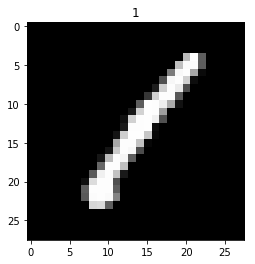

In [31]:
show(x_imgs[0], y[0])

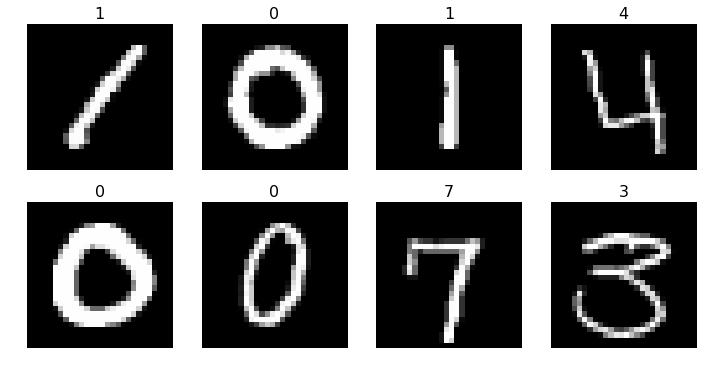

In [32]:
plots(x_imgs[:8], titles=y[:8])

## Neural net

In [34]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

In [35]:
net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

In [50]:
??ImageClassifierData

In [51]:
md = ImageClassifierData.from_arrays(path, (x,y), (x,y),test=x_test)

In [43]:
loss=nn.NLLLoss()
metrics=[accuracy]
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [44]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.262335   0.284502   0.919905  
    1      0.221062   0.233714   0.931786                                                                              
    2      0.197726   0.164437   0.954238                                                                              
    3      0.24011    0.278424   0.918571                                                                              
    4      0.193369   0.163391   0.953381                                                                              



[array([0.16339]), 0.9533809523809523]

In [45]:
set_lrs(opt, 1e-2)

In [46]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.070846   0.056685   0.983095  
    1      0.054924   0.045073   0.987905                                                                              
    2      0.047649   0.038152   0.989833                                                                              



[array([0.03815]), 0.9898333333333333]

In [52]:
preds = predict(net, md.test_dl)

In [53]:
preds.argmax(axis=1)[:5]

array([2, 0, 9, 9, 3], dtype=int64)

In [54]:
test_imgs = np.reshape(x_test, (-1,28,28)); test_imgs.shape

(28000, 28, 28)

In [56]:
preds = preds.argmax(1)

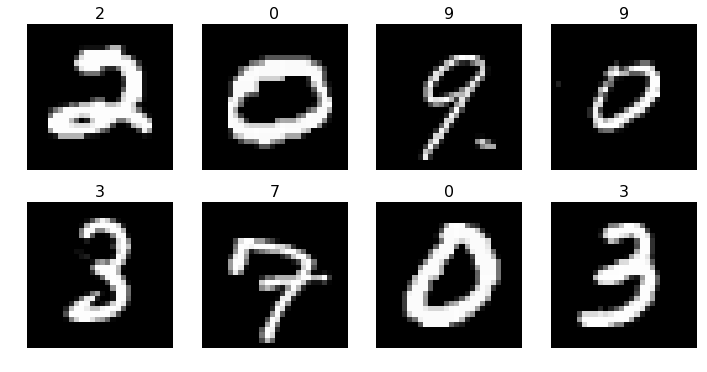

In [57]:
plots(test_imgs[:8], titles=preds[:8])

In [69]:
Id = pd.Series(range(1,28001))

In [70]:
my_submission = pd.DataFrame({'ImageId':Id, 'Label':preds})

In [71]:
my_submission.to_csv('digit_submission.csv', index=False)

## Result(s) 

0.97385 is the score of my first try. Not so bad! 1622/2494 entries feels kinda bad though. However, I've got a sense of how powerful this method is, and I'm so eager to learn more! 